In [1]:
from puncta_quantification import *

In [2]:
post0gr_dict_list = []
post0gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2018_12_28/u2os_ipo9_kd_30_m_post_0gr_pH2AX_53pb1_dapi_a'))
post0gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2019_01_14/6hr_ipo9_kd_a_happy/'))
post0gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2019_01_14/24hr_ipo9_kd_a_happy'))

post2gr_dict_list = []
post2gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2018_12_28/u2os_ipo9_kd_60_m_post_2gr_pH2AX_53pb1_dapi_a'))
post2gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2019_01_14/6hr_ipo9_kd_a_sad'))
post2gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2019_01_14/24hr_ipo9_kd_sad/'))

In [3]:
from numpy import array, zeros, median

In [4]:
no_time_points = 3
post0gr_lambda1_flux_density_median_row = zeros(no_time_points)
post0gr_lambda1_flux_density_stderr_2d = zeros((no_time_points, 2))
post0gr_lambda2_flux_density_median_row = zeros(no_time_points)
post0gr_lambda2_flux_density_stderr_2d = zeros((no_time_points, 2))

for i in range(no_time_points):
    i_region_area_row = post0gr_dict_list[i]['region_size']
    i_lambda1_flux_row = post0gr_dict_list[i]['lambda1_flux']
    i_lambda2_flux_row = post0gr_dict_list[i]['lambda2_flux']
    i_lambda1_flux_density_row = array(i_lambda1_flux_row) / i_region_area_row
    i_lambda2_flux_density_row = array(i_lambda2_flux_row) / i_region_area_row
    post0gr_lambda1_flux_density_median_row[i], i_ci_row = bootstrap_median(i_lambda1_flux_density_row)
    post0gr_lambda1_flux_density_stderr_2d[i, 0] = i_ci_row[0]
    post0gr_lambda1_flux_density_stderr_2d[i, 1] = i_ci_row[1]
    post0gr_lambda2_flux_density_median_row[i], i_ci_row = bootstrap_median(i_lambda2_flux_density_row)
    post0gr_lambda2_flux_density_stderr_2d[i, 0] = i_ci_row[0]
    post0gr_lambda2_flux_density_stderr_2d[i, 1] = i_ci_row[1]

Text(0.5, 1.0, '53BP1 in untreated IPO9 KD')

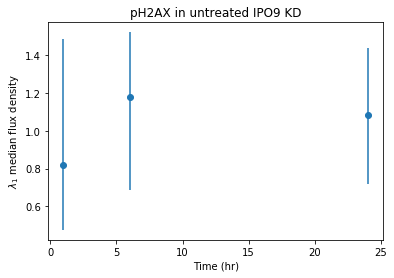

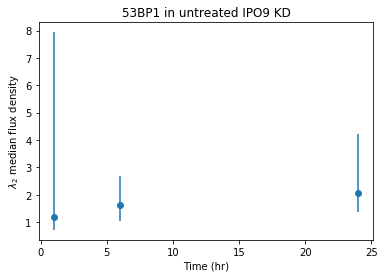

In [5]:
from matplotlib.pyplot import subplots
hour_row = array([1, 6, 24])
fig_obj, axes_obj = subplots()
axes_obj.errorbar(hour_row, post0gr_lambda1_flux_density_median_row,
                  yerr = post0gr_lambda1_flux_density_stderr_2d.transpose(), marker = 'o', linestyle = '')
axes_obj.set_xlabel('Time (hr)')
axes_obj.set_ylabel('$\lambda_1$ median flux density')
axes_obj.set_title('pH2AX in untreated IPO9 KD')

fig_obj, axes_obj = subplots()
axes_obj.errorbar(hour_row, post0gr_lambda2_flux_density_median_row,
                  yerr = post0gr_lambda2_flux_density_stderr_2d.transpose(), marker = 'o', linestyle = '')
axes_obj.set_xlabel('Time (hr)')
axes_obj.set_ylabel('$\lambda_2$ median flux density')
axes_obj.set_title('53BP1 in untreated IPO9 KD')

In [6]:
post2gr_lambda1_flux_density_median_row = zeros(no_time_points)
post2gr_lambda1_flux_density_stderr_2d = zeros((no_time_points, 2))
post2gr_lambda2_flux_density_median_row = zeros(no_time_points)
post2gr_lambda2_flux_density_stderr_2d = zeros((no_time_points, 2))

for i in range(no_time_points):
    i_region_area_row = post2gr_dict_list[i]['region_size']
    i_lambda1_flux_row = post2gr_dict_list[i]['lambda1_flux']
    i_lambda2_flux_row = post2gr_dict_list[i]['lambda2_flux']
    i_lambda1_flux_density_row = array(i_lambda1_flux_row) / i_region_area_row
    i_lambda2_flux_density_row = array(i_lambda2_flux_row) / i_region_area_row
    post2gr_lambda1_flux_density_median_row[i], i_ci_row = bootstrap_median(i_lambda1_flux_density_row)
    post2gr_lambda1_flux_density_stderr_2d[i, 0] = i_ci_row[0]
    post2gr_lambda1_flux_density_stderr_2d[i, 1] = i_ci_row[1]
    post2gr_lambda2_flux_density_median_row[i], i_ci_row = bootstrap_median(i_lambda2_flux_density_row)
    post2gr_lambda2_flux_density_stderr_2d[i, 0] = i_ci_row[0]
    post2gr_lambda2_flux_density_stderr_2d[i, 1] = i_ci_row[1]

Text(0.5, 1.0, 'pH2AX in irradiated IPO9 KD')

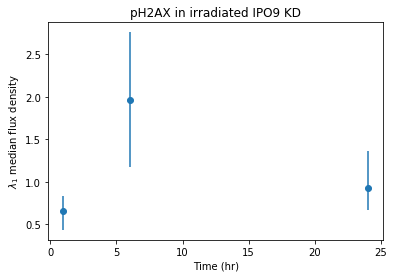

In [7]:
fig_obj, axes_obj = subplots()
axes_obj.errorbar(hour_row, post2gr_lambda1_flux_density_median_row,
                  yerr = post2gr_lambda1_flux_density_stderr_2d.transpose(), marker = 'o', linestyle = '')
axes_obj.set_xlabel('Time (hr)')
axes_obj.set_ylabel('$\lambda_1$ median flux density')
axes_obj.set_title('pH2AX in irradiated IPO9 KD')

Text(0.5, 1.0, '53BP1 in irradiated IPO9 KD')

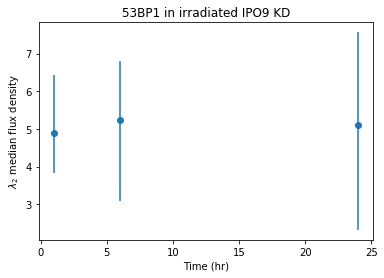

In [8]:
fig_obj, axes_obj = subplots()
axes_obj.errorbar(hour_row, post2gr_lambda2_flux_density_median_row,
                  yerr = post2gr_lambda2_flux_density_stderr_2d.transpose(), marker = 'o', linestyle = '')
axes_obj.set_xlabel('Time (hr)')
axes_obj.set_ylabel('$\lambda_2$ median flux density')
axes_obj.set_title('53BP1 in irradiated IPO9 KD')